In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import joblib

In [3]:
df = pd.read_csv('The_Cancer_data_1500_V2.csv')
df.head(10)


,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1
5,27,0,37.105162,0,1,3.941905,2.324274,0,0
6,80,1,20.701994,0,0,8.482031,3.152943,0,0
7,40,0,20.301121,1,0,4.929827,2.247995,1,0
8,58,1,30.274525,0,1,4.719025,0.943161,1,1
9,77,0,25.275712,0,1,4.903125,2.539487,0,0


In [4]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


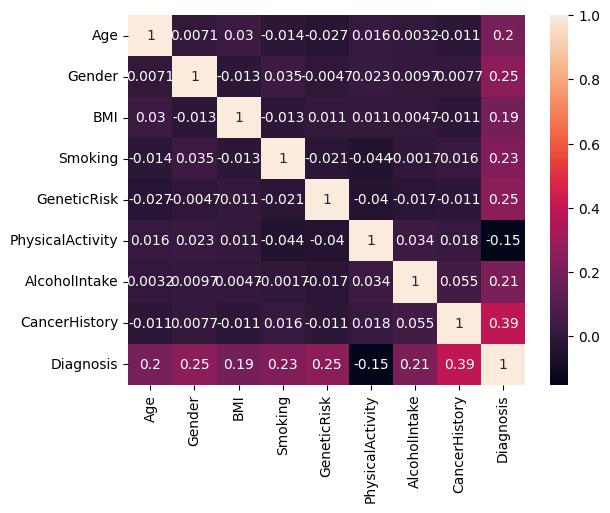

In [11]:
correlations = df.corr()
sns.heatmap(correlations, annot=True)
plt.show()

In [8]:
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

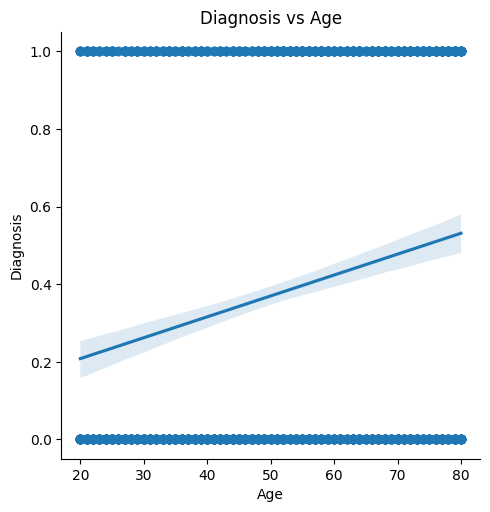

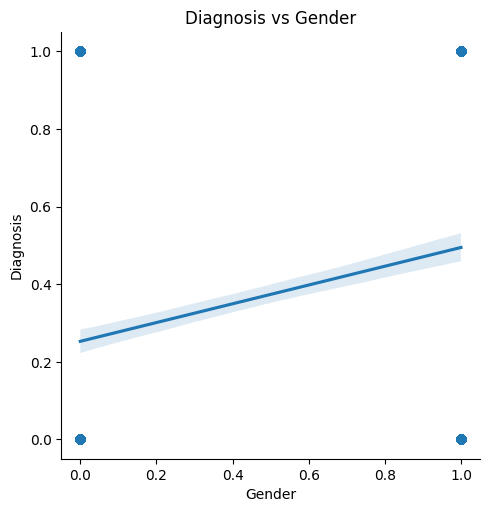

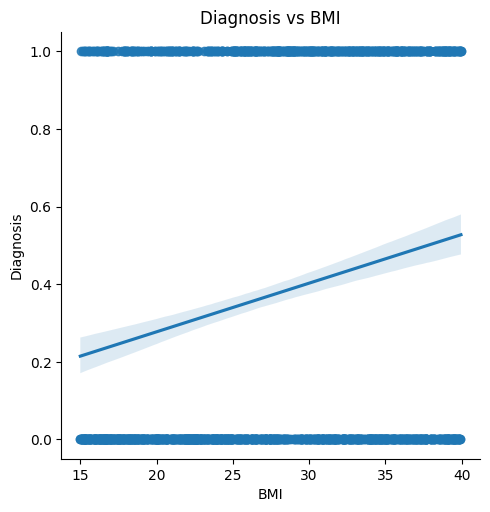

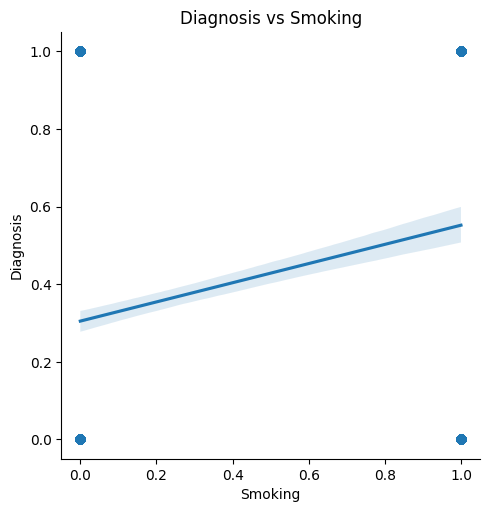

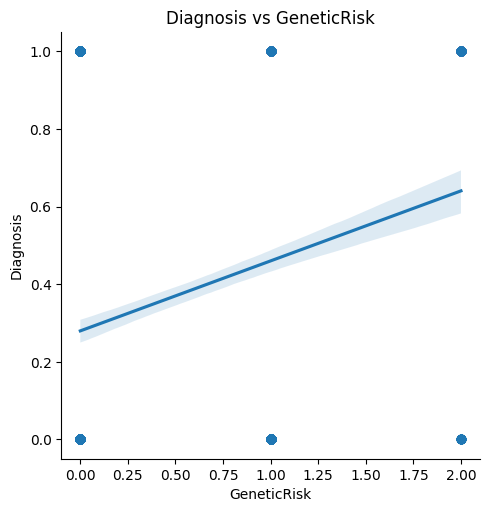

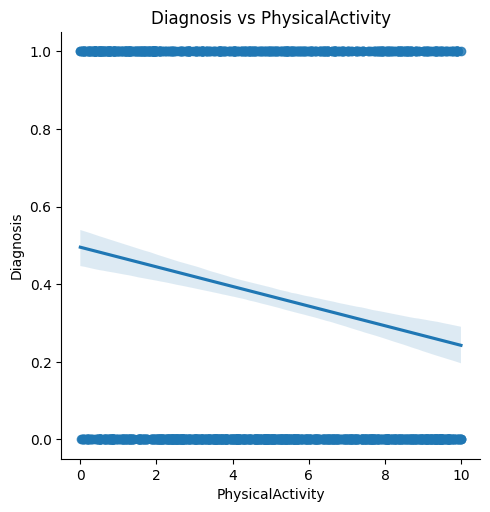

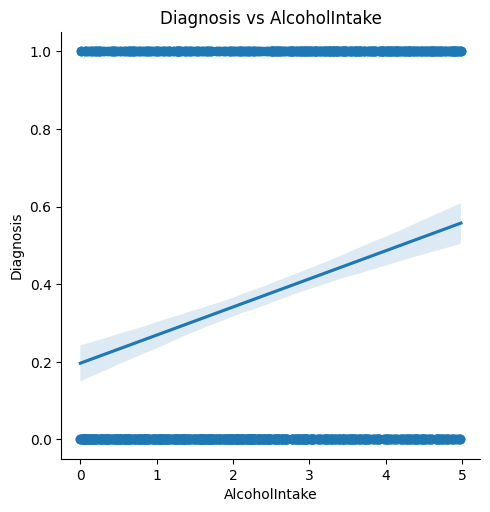

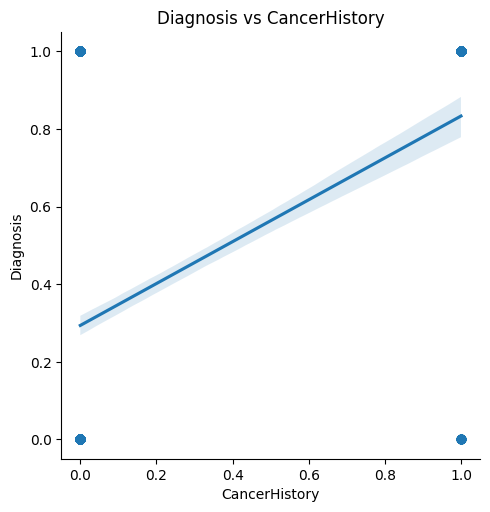

In [14]:
for col in X.columns:
    sns.lmplot(x=col, y='Diagnosis', data=df)
    plt.title('Diagnosis vs ' + col)
    plt.show()

In [15]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [17]:
model = LogisticRegression()

In [18]:
model.fit(X_train, y_train)

LogisticRegression()

In [19]:
print(model.score(X_test, y_test))

0.86


In [20]:
from sklearn.metrics import mean_absolute_error


y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("mean absolute error: ", mae)
rsme = np.sqrt(mae)
print("root mean squared error: ", rsme)

mean absolute error:  0.14
root mean squared error:  0.37416573867739417


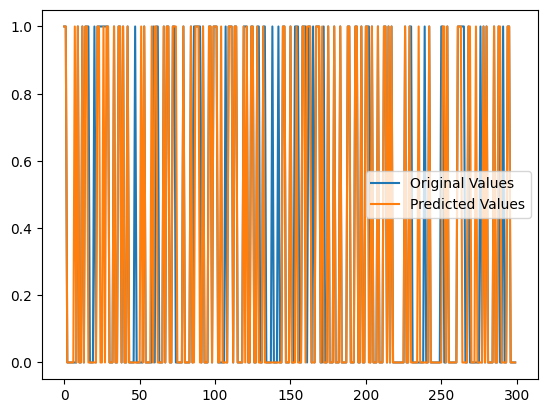

In [22]:
y_test_values = y_test.values.flatten()

plt.plot(y_test_values, label='Original Values')
plt.plot(y_pred, label='Predicted Values')
plt.legend()
plt.show()

In [28]:
joblib.dump(model, '../models/cancer_model.joblib')

['../models/cancer_model.joblib']